In [122]:
%load_ext autoreload
%autoreload 2
from lab.postprocessing.toolbox import *
from lab.postprocessing.visualization import get_grid_points, make_violin_plot
from lab.data.datasets import Blob3CDataset
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import torch
import os
import numpy as np
import sklearn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'

In [26]:
def plot_data(dataset):
    input = dataset.input
    target = dataset.target
    class1 = input[target == 0]
    class2 = input[target == 1]
    class3 = input[target == 2]

    plt.scatter(class1[:, 0], class1[:, 1], c='darkred', s=1, label='class 1')
    plt.scatter(class2[:, 0], class2[:, 1], c='midnightblue', s=1, label='class 2')
    plt.scatter(class3[:, 0], class3[:, 1], c='green', s=1, label='class 3')
    plt.legend()
    plt.xlim(-1, 1.5)
    plt.ylim(-1.5, 2.5)
    plt.xticks([])
    plt.yticks([])

# custom colormap
CMAP = ListedColormap(['lightcoral', 'cornflowerblue', 'lightgreen'])

# points to evaluate
POINTS = get_grid_points(-1, 1.5, -1.5, 2.5, step_size=.01)

def plot_decision(logits):
    y = torch.argmax(logits, dim=-1)

    plt.figure(figsize=(7, 5), dpi=150)

    y = torch.argmax(logits, dim=1)
    
    plt.scatter(POINTS[:, 0], POINTS[:, 1], c=y.cpu(), cmap=CMAP, s=5)
    cbar = plt.colorbar()
    cbar.set_label('probability of class 1')
    
def plot_recs(final_steps):
    plt.figure(figsize=(5, 5), dpi=150)
    plt.scatter(POINTS[:, 0][final_steps == 0],
                POINTS[:, 1][final_steps == 0],
                c='white', s=5, label='1 recurrence')
    plt.scatter(POINTS[:, 0][final_steps == 1],
                POINTS[:, 1][final_steps == 1],
                c='bisque', s=5, label='2 recurrences')
    plt.scatter(POINTS[:, 0][final_steps == 2],
                POINTS[:, 1][final_steps == 2],
                c='lightblue', s=5, label='3 recurrences')

# Data

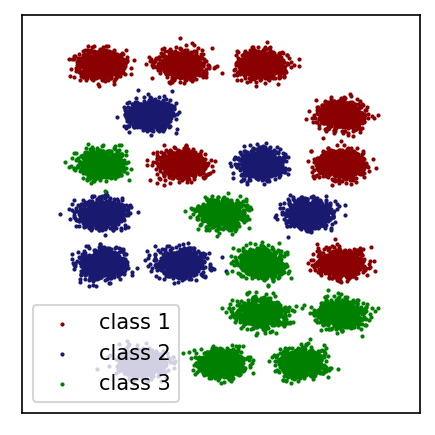

In [27]:
dataset = Blob3CDataset(device='cpu', seed=1)
plt.figure(figsize=(3, 3), dpi=150)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blobmod'))

In [149]:
acc_mlp = []

model_dir = 'blob3c/mlp/_model_layer_dims_(2, 2)'
acc_mlp.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/mlp/_model_layer_dims_(2, 2, 2)'
acc_mlp.append(load_and_evaluate_dir(result_dir, model_dir))

-----
accuracy:  75.96 +-  7.99
cross entropy:  0.412 +-  0.106
computational cost:  14.000 +-  0.000
number parameters: 21
-----
accuracy:  83.02 +-  10.58
cross entropy:  0.271 +-  0.141
computational cost:  18.000 +-  0.000
number parameters: 27


In [116]:
acc_rnn_thresh = []

# threshold
model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.6_trainer_max_rec_scheduler.step_length_200'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.7_trainer_max_rec_scheduler.step_length_200'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.8_trainer_max_rec_scheduler.step_length_200'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.5_trainer_max_rec_scheduler.step_length_5'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.6_trainer_max_rec_scheduler.step_length_5'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.7_trainer_max_rec_scheduler.step_length_5'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.8_trainer_max_rec_scheduler.step_length_5'
acc_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir))


-----
accuracy:  75.60 +-  8.19
cross entropy:  0.877 +-  1.012
computational cost:  15.350 +-  0.741
number parameters: 21
-----
accuracy:  70.48 +-  10.18
cross entropy:  2.184 +-  1.511
computational cost:  17.843 +-  1.265
number parameters: 21
-----
accuracy:  64.33 +-  9.08
cross entropy:  1.712 +-  0.714
computational cost:  19.382 +-  0.691
number parameters: 21
-----
accuracy:  77.77 +-  12.10
cross entropy:  0.373 +-  0.158
computational cost:  15.697 +-  2.987
number parameters: 21
-----
accuracy:  72.50 +-  4.47
cross entropy:  0.570 +-  0.073
computational cost:  21.729 +-  1.760
number parameters: 21
-----
accuracy:  75.75 +-  7.44
cross entropy:  0.494 +-  0.123
computational cost:  20.998 +-  2.039
number parameters: 21
-----
accuracy:  82.18 +-  3.50
cross entropy:  0.405 +-  0.056
computational cost:  21.193 +-  1.610
number parameters: 21


In [117]:
acc_rnn_learn = []
# learnable
model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_learnable_model_learnable_target_first_correct_model_rec_fn_type_rbf'
acc_rnn_learn.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_learnable_model_learnable_target_first_correct_model_rec_fn_type_mlp'
acc_rnn_learn.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_learnable_model_learnable_target_none_model_rec_fn_type_rbf'
acc_rnn_learn.append(load_and_evaluate_dir(result_dir, model_dir))

model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_learnable_model_learnable_target_none_model_rec_fn_type_mlp'
acc_rnn_learn.append(load_and_evaluate_dir(result_dir, model_dir))




-----
accuracy:  84.30 +-  3.88
cross entropy:  0.321 +-  0.067
computational cost:  23.805 +-  0.896
number parameters: 33
-----
accuracy:  86.41 +-  6.89
cross entropy:  0.316 +-  0.089
computational cost:  24.414 +-  0.930
number parameters: 33
-----
accuracy:  84.38 +-  6.36
cross entropy:  0.324 +-  0.168
computational cost:  24.675 +-  1.090
number parameters: 33
-----
accuracy:  83.26 +-  9.64
cross entropy:  0.355 +-  0.167
computational cost:  23.011 +-  1.348
number parameters: 33


In [118]:
# regression
acc_rnn_reg = []

crit_estim = sklearn.linear_model.LogisticRegression()
model_dir = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_first_correct_trainer_max_rec_scheduler.step_length_300'
acc_rnn_reg.append(load_and_evaluate_dir(result_dir, model_dir, crit_estim))

-----
accuracy:  75.07 +-  7.06
cross entropy:  5.465 +-  5.036
computational cost:  15.280 +-  0.508
number parameters: 21


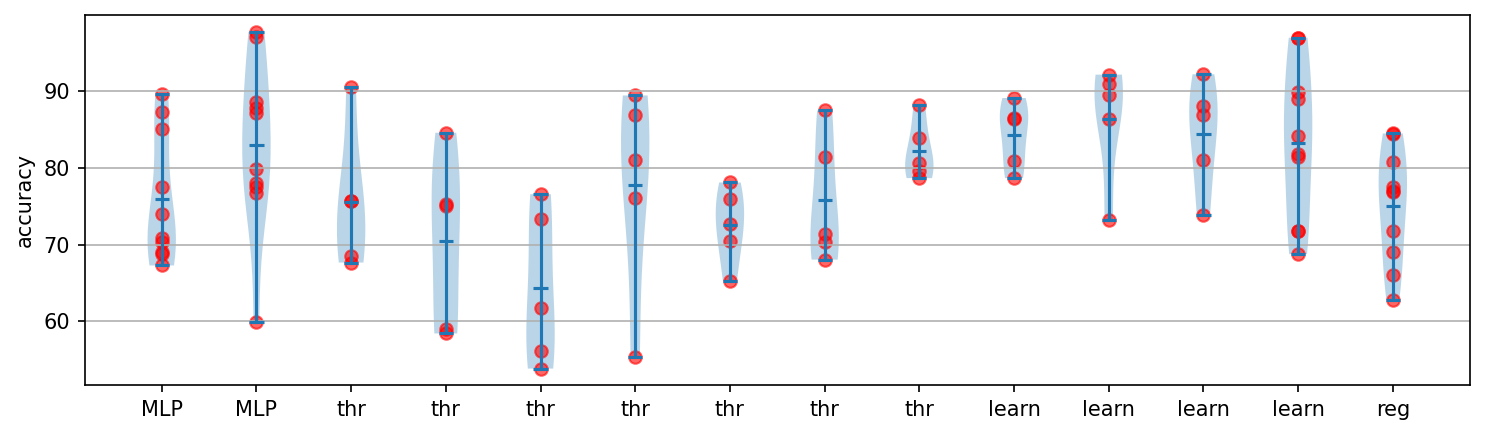

In [150]:
plt.figure(figsize=(10, 3), dpi=150)
accs = acc_mlp + acc_rnn_thresh + acc_rnn_learn + acc_rnn_reg
make_violin_plot(accs)

plt.xticks(range(len(accs)), ['MLP'] * len(acc_mlp) + 
           ['thr'] * len(acc_rnn_thresh) + 
           ['learn'] * len(acc_rnn_learn) + 
           ['reg'] * len(acc_rnn_reg))
plt.ylabel('accuracy')
plt.tight_layout()
plt.grid(visible=True, axis='y')
#plt.savefig(os.path.join(result_dir, 'images/blob_violin'))

# MLP 3 layers

cost: 14


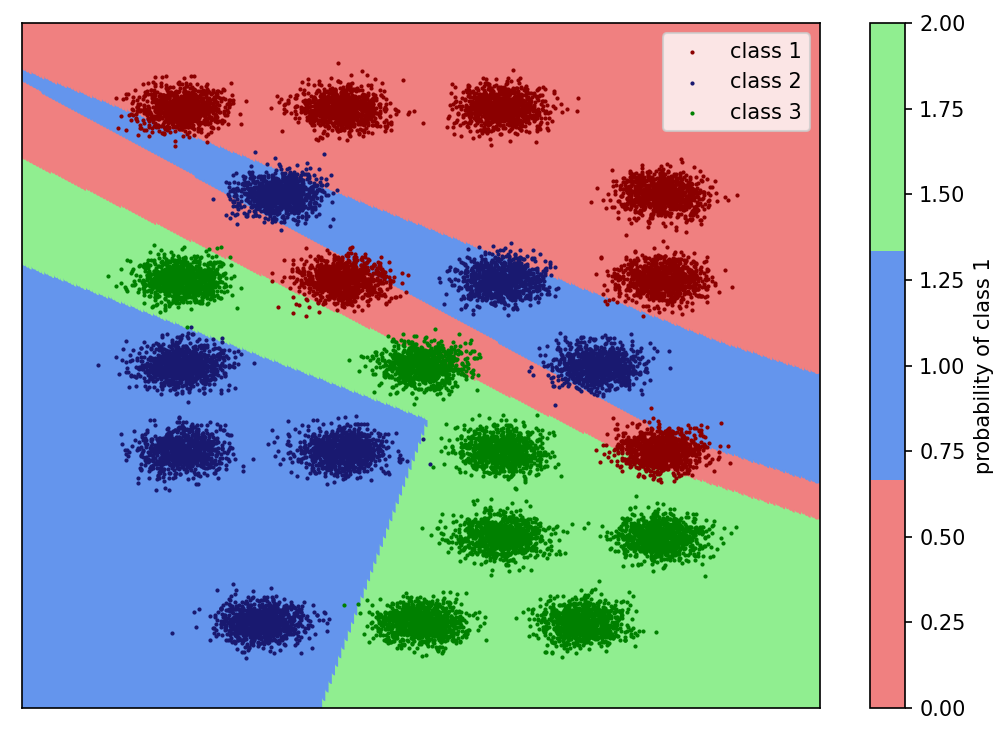

In [49]:
model_name = 'blob3c/mlp/_model_layer_dims_(2, 2)/0730-144420'

model, loader = load_model(result_dir, model_name)

cost = get_computational_cost(model)
print('cost:', cost)

# evaluate model for all points in the plane
logits = model(POINTS.to(model.device))
plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
plt.savefig(os.path.join(result_dir, 'images/blob_mlp3'))

# MLP 4 layers

cost: 18


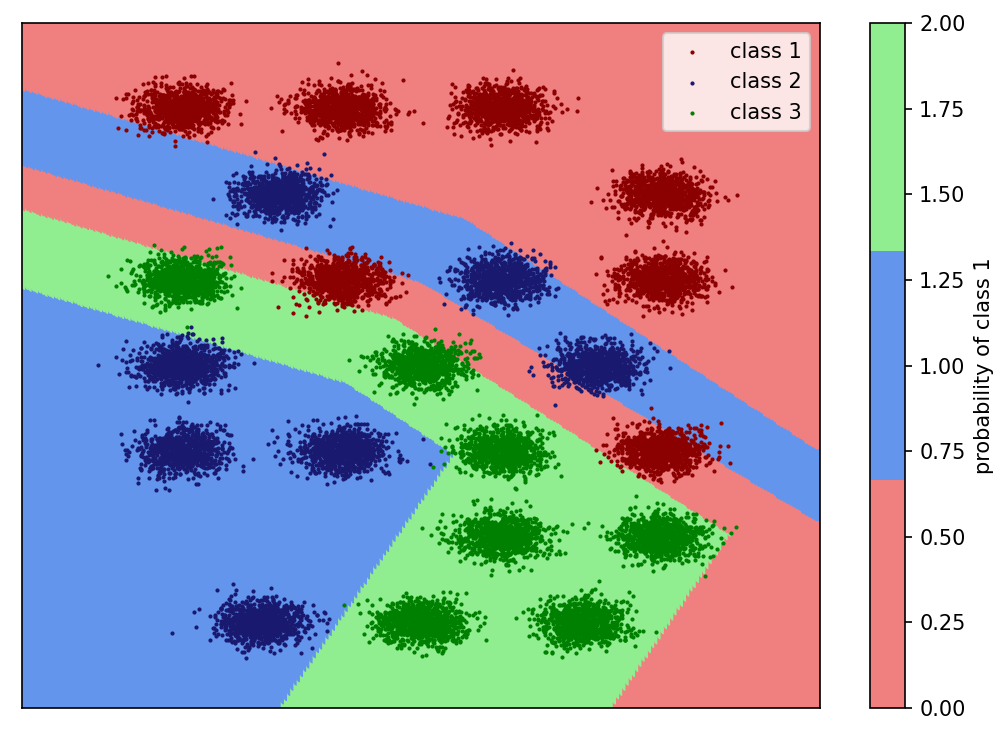

In [50]:
model_name = 'blob3c/mlp/_model_layer_dims_(2, 2, 2)/0730-145727'

model, loader = load_model(result_dir, model_name)

cost = get_computational_cost(model)
print('cost:', cost)

logits = model(POINTS.to(model.device))
plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blob_mlp4'))

# RNN threshold



average cost: tensor(14.8143)


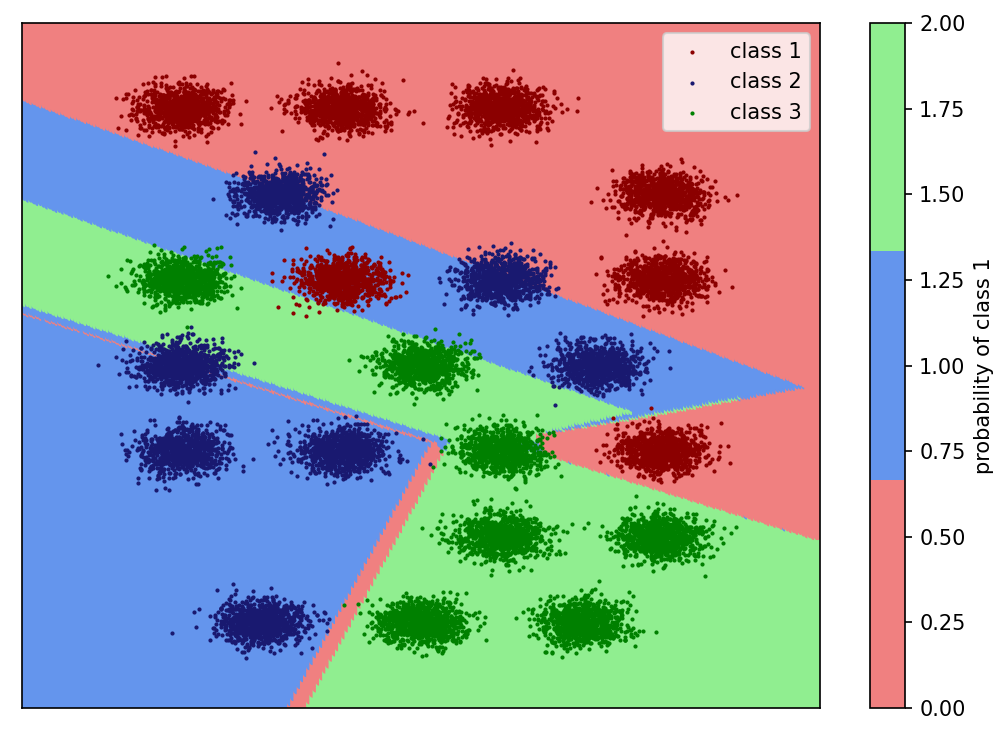

In [165]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'
model_name = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.6_trainer_max_rec_scheduler.step_length_200/0804-124646'

model, loader = load_model(result_dir, model_name)

logits_stacked = model(POINTS.to(model.device))
final_steps = model.get_final_steps(POINTS.to(model.device), logits_stacked, None, evaluate=True)
logits = model.get_final_logits(logits_stacked, final_steps)

cost = get_computational_cost(model, loader.valid)
print('average cost:', cost)

plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blobmod_rnn_dec'))

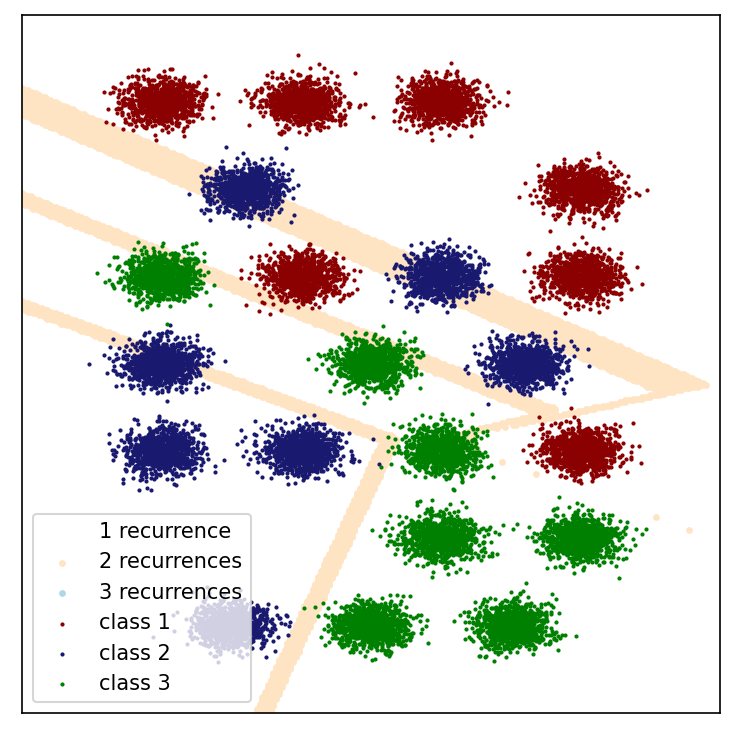

In [166]:
plot_recs(final_steps)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blob_rnn_rec'))

# RNN learnable

fc layer: 4
rnn layer: tensor(7.2210)
out layer: 6
rec_fn layer: 4
average cost: tensor(25.2210)


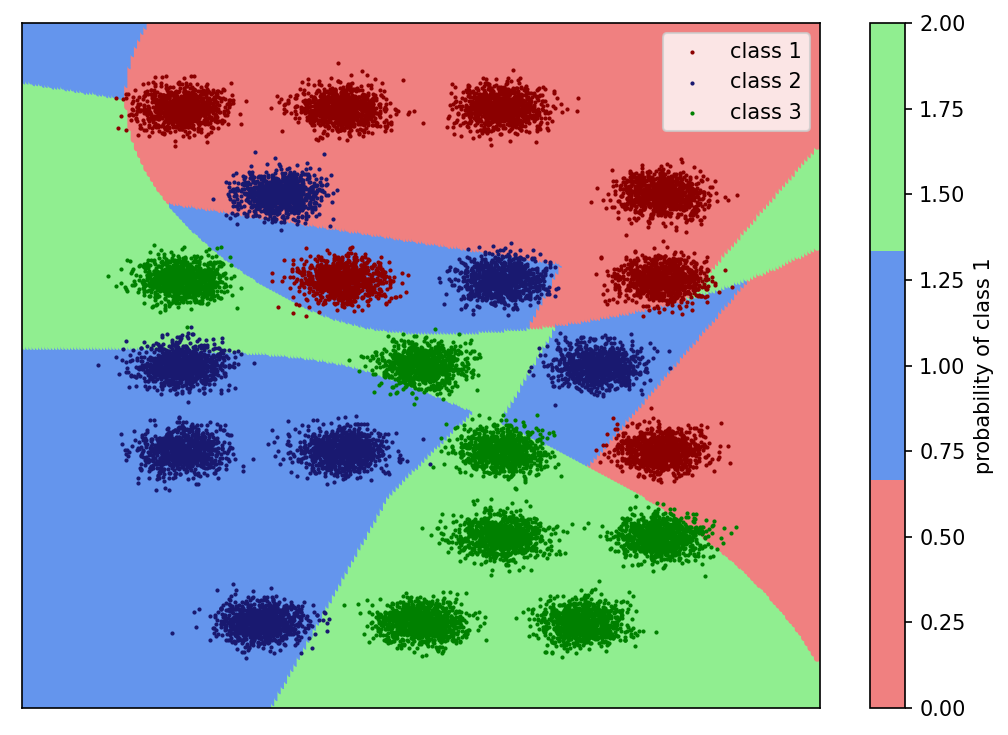

In [66]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'
model_name = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_learnable_model_learnable_target_first_correct_model_rec_fn_type_rbf/0804-124327'

model, loader = load_model(result_dir, model_name)

logits_stacked = model(POINTS.to(model.device))
final_steps = model.get_final_steps(POINTS.to(model.device), logits_stacked, None, evaluate=True)
#final_steps = torch.zeros_like(final_steps, device=model.device)
logits = model.get_final_logits(logits_stacked, final_steps)

cost = get_computational_cost(model, loader.valid, verbose=True)
print('average cost:', cost)

plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blobmod_rnn_dec'))

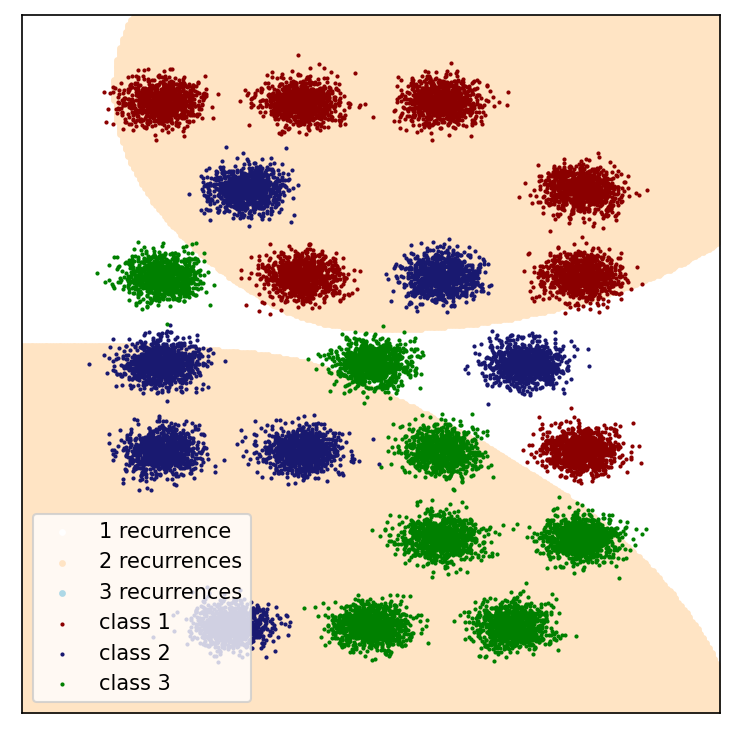

In [67]:
plot_recs(final_steps)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blob_rnn_rec'))

# RNN first correct

training estimator
testing estimator
recurrence estimator test accuracy: 0.8438095238095238
model accuracy: 84.38095563933963
model steps: tensor(14.6248)


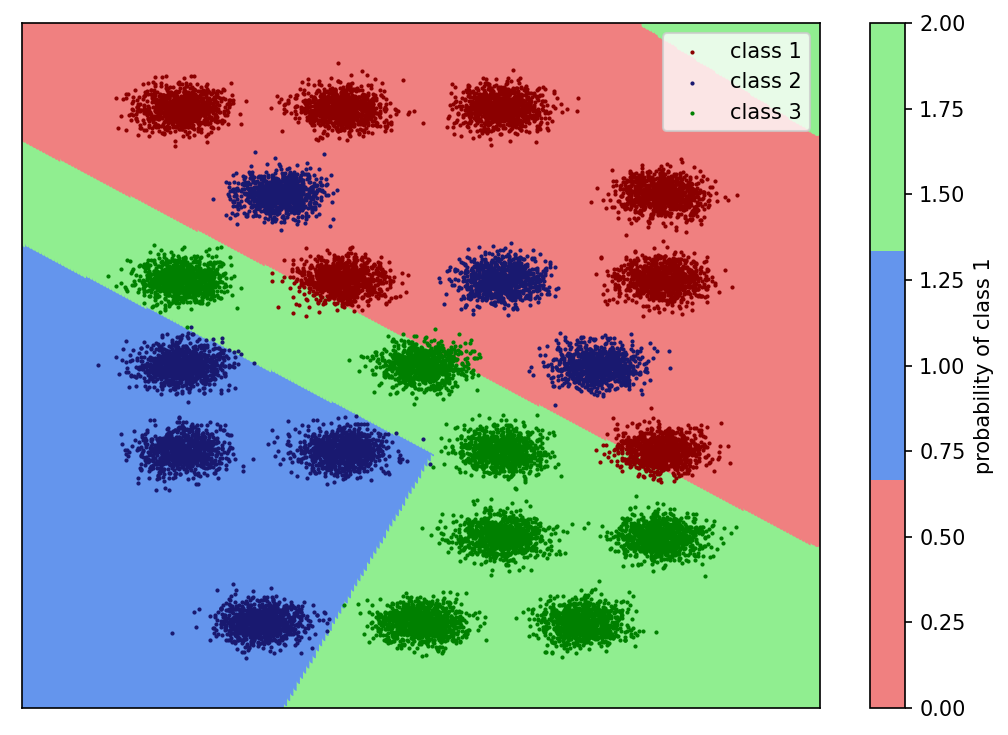

In [164]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'
model_name = 'blob3c/rnn/_model_rnn_type_linear_model_stopping_criterion_first_correct_trainer_max_rec_scheduler.step_length_300/0730-162307'
#model_name = 'blob3c/rnn/_model_rnn_type_linear_model_max_rec_3_model_stopping_criterion_first_correct_trainer_max_rec_scheduler.step_length_300/0730-160935'

model, loader = load_model(result_dir, model_name)

#crit_estim = sklearn.tree.DecisionTreeClassifier(max_depth=4)
crit_estim = sklearn.linear_model.LogisticRegression()
crit_estim = get_recurrence_estimator(model, loader, crit_estim, verbose=True)
model.crit_estim = crit_estim

acc, _, steps = evaluate(model, loader.valid)
print('model accuracy:', acc)
print('model steps:', steps)

logits_stacked = model(POINTS.to(model.device))
final_steps = model.get_final_steps(POINTS.to(model.device), logits_stacked, None, evaluate=True)
logits = model.get_final_logits(logits_stacked, final_steps)

plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blobmod_rnn_dec'))

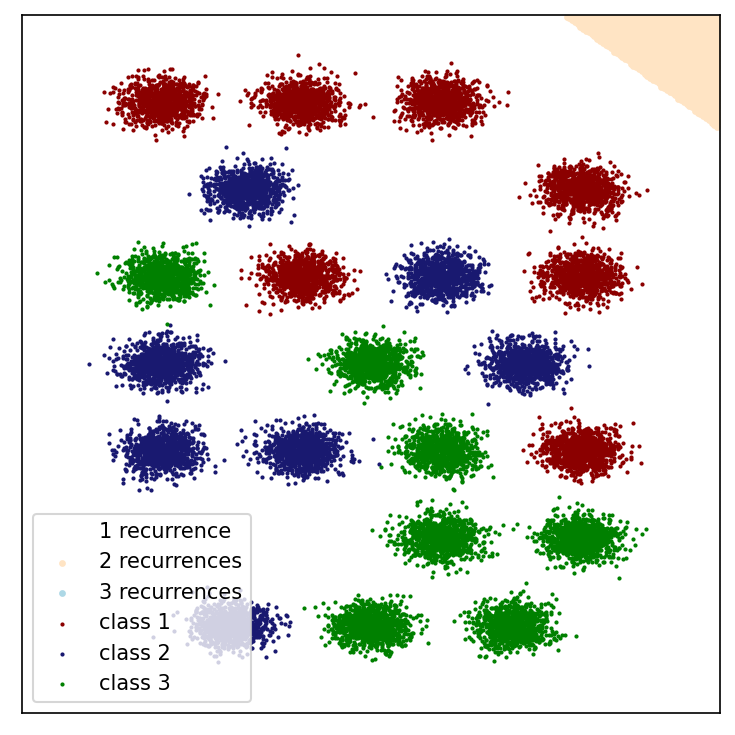

In [74]:
plot_recs(final_steps)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blob_rnn_rec'))

In [154]:
x_train, _, y_train = get_final_steps_data(model, loader.train)
x_test, _, y_test = get_final_steps_data(model, loader.test)
#clf = sklearn.tree.DecisionTreeClassifier(max_depth=6)
clf = sklearn.linear_model.LogisticRegression()
clf.fit(x_train.cpu(), y_train.cpu())
acc = clf.score(x_test.cpu(), y_test.cpu())
print('accuracy of classifier:', acc)
#print('number of nodes:', clf.tree_.node_count)

accuracy of classifier: 0.6247619047619047


In [151]:
make_table(result_dir, model_type='blob3c/mlp')

\begin{center}
\begin{tabular}{ |c||c|c|c|c c|c c| }
\hline
 & & & & best & best & cheapest & cheapest \\
model & ACC & CE & OPS & ACC & OPS & ACC & OPS \\
\hline
_model_layer_dims_(2, 2) & 75.96 \pm  7.99 &  0.41 \pm  0.11 &  14.00 \pm  0.00 &  89.57 &  14.00 &  67.29 &  14.00 \\
\hline
_model_layer_dims_(2, 2, 2) & 83.02 \pm  10.58 &  0.27 \pm  0.14 &  18.00 \pm  0.00 &  97.71 &  18.00 &  88.57 &  18.00 \\
\hline
\end{tabular}
\end{center}


In [148]:
make_table(result_dir, model_type='blob3c/rnn', crit_estim=sklearn.linear_model.LogisticRegression())

\begin{center}
\begin{tabular}{ |c||c|c|c|c c|c c| }
\hline
 & & & & best & best & cheapest & cheapest \\
model & ACC & CE & OPS & ACC & OPS & ACC & OPS \\
\hline
_model_rnn_type_linear_model_stopping_criterion_first_correct_trainer_max_rec_scheduler.step_length_300 & 75.07 \pm  7.06 &  5.470 \pm  5.040 &  15.28 \pm  0.51 &  84.48 &  14.62 &  84.48 &  14.62 \\
\hline
_model_rnn_type_linear_model_stopping_criterion_learnable_model_learnable_target_first_correct_model_rec_fn_type_mlp & 86.41 \pm  6.89 &  0.320 \pm  0.090 &  24.41 \pm  0.93 &  92.14 &  25.00 &  90.95 &  23.01 \\
\hline
_model_rnn_type_linear_model_stopping_criterion_learnable_model_learnable_target_first_correct_model_rec_fn_type_rbf & 84.30 \pm  3.88 &  0.320 \pm  0.070 &  23.81 \pm  0.90 &  89.10 &  25.22 &  78.67 &  22.78 \\
\hline
_model_rnn_type_linear_model_stopping_criterion_learnable_model_learnable_target_none_model_rec_fn_type_mlp & 83.26 \pm  9.64 &  0.360 \pm  0.170 &  23.01 \pm  1.35 &  96.95 &  22.00 &  96.9